<a href="https://colab.research.google.com/github/pravinkucha/Deep-Learning/blob/master/lstm_msg_spam_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datasets_483_982_spam.csv to datasets_483_982_spam (2).csv
User uploaded file "datasets_483_982_spam.csv" with length 503663 bytes


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
data = pd.read_csv(io.StringIO(uploaded['datasets_483_982_spam.csv'].decode('latin-1')))
del data['Unnamed: 2'],data['Unnamed: 3'],data['Unnamed: 4']
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


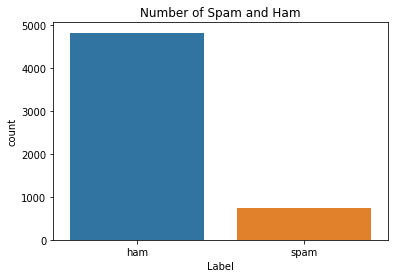

Spam : 4825
Ham : 747


In [3]:
sns.countplot(data.v1)
plt.xlabel('Label')
plt.title('Number of Spam and Ham')
plt.show()
spam,ham = data['v1'].value_counts()
print("Spam :",spam)
print("Ham :",ham)


In [4]:
X = data.v2
Y = data.v1
print(Y.shape)
Y

(5572,)


0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [5]:
#Preprocessing data and splite
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
obj_le  = LabelEncoder()
y       = obj_le.fit_transform(Y)
y       = y.reshape(-1,1)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split = train_test_split(X,y,test_size=0.15)
X_train.head()

(5572, 1)


2964    Not yet had..ya sapna aunty manege y'day hogid...
3874    Okie but i scared u say i fat... Then u dun wa...
451         Thanks for this hope you had a good day today
1695    Finish already... Yar they keep saying i mushy...
862     Sorry, I guess whenever I can get a hold of my...
Name: v2, dtype: object

In [6]:
#Text Preprocessing of text data
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
max_words = 1000
max_sent_len= 150
emb_dim = 50

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
#print(tok.word_index)
sequences = tok.texts_to_sequences(X_train)
embedded_matrix = pad_sequences(sequences,padding='pre',maxlen=max_sent_len)
embedded_matrix

Using TensorFlow backend.


array([[  0,   0,   0, ..., 254, 519,   7],
       [  0,   0,   0, ..., 252,  10, 141],
       [  0,   0,   0, ...,  55,  61,  88],
       ...,
       [  0,   0,   0, ...,   4, 313, 949],
       [  0,   0,   0, ...,   3, 799,  28],
       [  0,   0,   0, ...,   2,  33,   4]], dtype=int32)

In [7]:
#Working on DL Keras
from keras.models import  Model
from keras.layers import LSTM,Dense,Dropout,Input,Activation,Embedding
from keras.optimizers import  RMSprop
from keras.utils import  to_categorical
from keras.callbacks import EarlyStopping

def RNN():
  inputs = Input(name='inputs',shape = [max_sent_len])
  layers = Embedding(max_words,emb_dim,input_length=max_sent_len)(inputs)
  layers = LSTM(64)(layers)
  layers = Dense(256,name='FC1')(layers)
  layers = Activation('relu')(layers)
  layers = Dropout(0.5)(layers)
  layers = Dense(1,name='out_layer')(layers)
  layers = Activation('sigmoid')(layers)
  obj_model = Model(inputs=inputs,outputs=layers)
  return obj_model


obj_model = RNN() 
obj_model.summary()
obj_model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [8]:
obj_model.fit(embedded_matrix,y_train,epochs=10,batch_size=128,validation_split=0.2,callbacks=[EarlyStopping(monitor='var_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.3175 - accuracy: 0.8841 - val_loss: 0.1168 - val_accuracy: 0.9673
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `var_loss` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3788/3788 [==============================] - 7s 2ms/step - loss: 0.0813 - accuracy: 0.9828 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 3/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0427 - accuracy: 0.9889 - val_loss: 0.0524 - val_accuracy: 0.9873
Epoch 4/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0310 - accuracy: 0.9916 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 5/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0237 - accuracy: 0.9939 - val_loss: 0.0641 - val_accuracy: 0.9873
Epoch 6/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0192 - accuracy: 0.9950 - val_loss: 0.0675 - val_accuracy: 0.9842
Epoch 7/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0786 - val_accuracy: 0.9810
Epoch 8/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0836 - val_accuracy: 0.9842
Epo

In [9]:
#tok.fit_on_texts(X_test)
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_embedded_matrix = pad_sequences(X_test_sequences,padding='pre',maxlen=max_sent_len)
X_test_embedded_matrix

array([[  0,   0,   0, ...,  90,   2, 109],
       [  0,   0,   0, ..., 649, 135, 582],
       [  0,   0,   0, ...,   2, 201, 782],
       ...,
       [  0,   0,   0, ..., 165,   7,  66],
       [  0,   0,   0, ...,  57, 349, 316],
       [  0,   0,   0, ...,   0,   0,   3]], dtype=int32)

In [10]:
accurcy = obj_model.evaluate(X_test_embedded_matrix,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accurcy[0],accurcy[1]))

836/836 [==============================] - 1s 627us/step
Test set
  Loss: 0.085
  Accuracy: 0.984


In [13]:
Testing_text = ["win price for watching this ..:)"]

test_text = tok.texts_to_sequences(Testing_text)
text_embed_matrix = pad_sequences(test_text,maxlen=max_sent_len)
preds = obj_model.predict(text_embed_matrix)
print(preds)

[[0.00087677]]


In [19]:
Testing_text = ["Oh k...i'm watching here:)"]

test_text = tok.texts_to_sequences(Testing_text)
text_embed_matrix = pad_sequences(test_text,maxlen=max_sent_len)
preds = obj_model.predict(text_embed_matrix)
print(preds)

[[9.852875e-08]]
